## Quant vs Quant  ------------------------> ScatterPlot
## Quant vs Qualit  ------------------------> ViolinPlot
## Qualit vs Qualit  ------------------------> ClusteredBarChart
## _-------------------------------------------------------------------------------------------------------------_

# Scatterplot and Correlation
#### -------------------------------------------------------

Relation between 2 quantitative variables. Pearson correlation coef. Varies from -1 to 1. Non linear not identified. 

To make variables correlate, one can use log

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df = pd.read_csv('fuel_econ.csv')
df.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


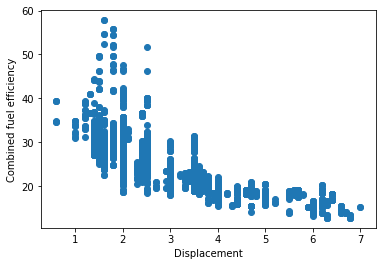

In [7]:
plt.scatter(data = df, x = 'displ', y = 'comb');
plt.xlabel('Displacement');
plt.ylabel('Combined fuel efficiency');

c:\users\hrishi\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


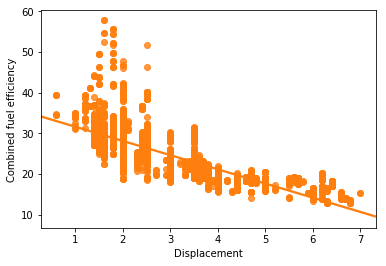

In [15]:
sb.regplot(data = df, x = 'displ', y = 'comb', color = sb.color_palette()[1]);
plt.xlabel('Displacement');
plt.ylabel('Combined fuel efficiency');

c:\users\hrishi\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


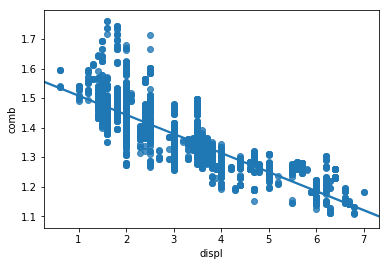

In [18]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

sb.regplot(df['displ'], df['comb'].apply(log_trans));

## Overplotting

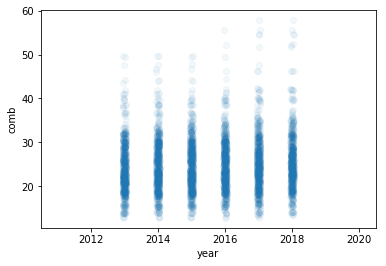

In [25]:
sb.regplot(data = df, x='year', y = 'comb', x_jitter = 0.05, scatter_kws = {'alpha':0.05}, fit_reg = False);

# Heat Maps

Good for descrete vs descrete. Alternative for transperancy in scatterplot. Bin-size is important

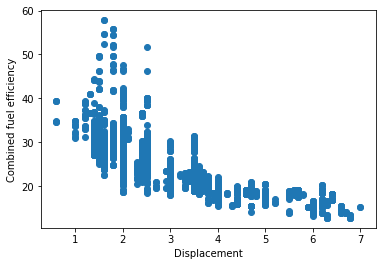

In [26]:
# Scatterplot
plt.scatter(data = df, x = 'displ', y = 'comb');
plt.xlabel('Displacement');
plt.ylabel('Combined fuel efficiency');

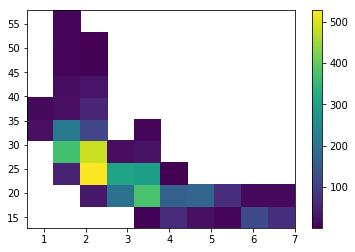

In [32]:
plt.hist2d(data=df, x='displ', y='comb', cmin = 0.1);   #bins=[x_bins, y_bins]
plt.colorbar();

# Violin Plots
X axis -> categorical. Y axis -> continuous

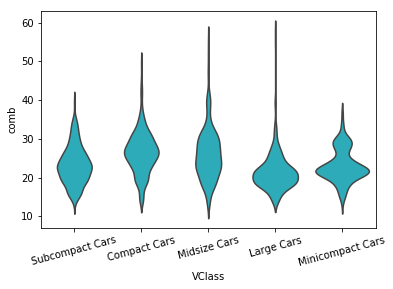

In [38]:
sb.violinplot(data = df, x = 'VClass', y = 'comb', inner = None, color = sb.color_palette()[-1]);
plt.xticks(rotation=15);

# Box Plot

X axis -> Discrete. Y axis -> Continuous.

Min_Left = Q1 - 1.5 * IQR

Q1 = 25th percentile, Q2, Q3 = 75th Percentile

Max_Right = Q3 + 1.5 * IQR

IQR = Q3 - Q1

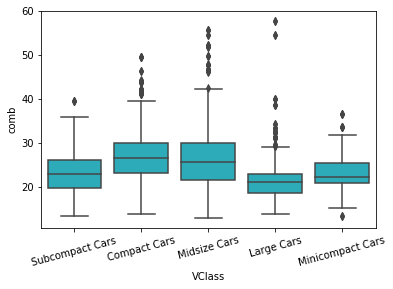

In [40]:
sb.boxplot(data = df, x = 'VClass', y = 'comb', color = sb.color_palette()[-1]);
plt.xticks(rotation=15);

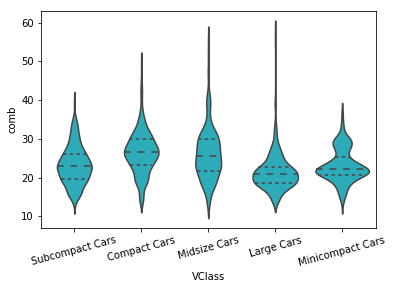

In [41]:
sb.violinplot(data = df, x = 'VClass', y = 'comb', inner = 'quartile', color = sb.color_palette()[-1]);
plt.xticks(rotation=15);

# Clustered Bar Chart -> Categorical vs Categorical

In [52]:
df.head(10)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,...,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6,Automatic
6,32210,Lexus,GS 350 AWD,2013,Midsize Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,...,99,18.5752,23.5261,26.3573,36.2109,21.4213,412,5,5,Automatic
7,32214,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,4,2.0,...,0,17.4460,21.7946,26.6295,37.6731,20.6507,432,5,5,Automatic
8,32215,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Manual 6-spd,Premium Gasoline,4,2.0,...,0,20.6741,26.2000,29.2741,41.8000,23.8235,375,6,6,Manual
9,32216,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,6,3.8,...,0,16.4675,20.4839,24.5605,34.4972,19.3344,461,4,4,Automatic


In [44]:
df['trans_type'] = df['trans'].apply(lambda x: x.split()[0])
df['trans_type'].value_counts()

Automatic    3068
Manual        861
Name: trans_type, dtype: int64

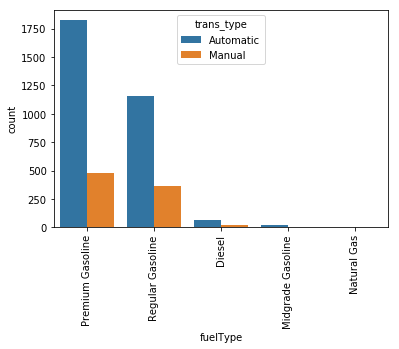

In [51]:
sb.countplot(data = df, x = 'fuelType', hue = 'trans_type') ;
plt.xticks(rotation=90);

# Facet Grid

## Categorical vs Numerical

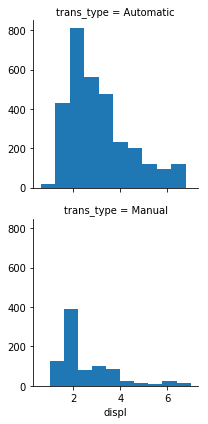

In [54]:
g = sb.FacetGrid(data = df, col = 'trans_type', col_wrap=1);    # col = categorical_var
g.map(plt.hist, 'displ');   #Can give bins parameter

# Adapted bar chart

In [56]:
'''
 we could plot a numeric variable against a categorical variable by adapting 
 a bar chart so that its bar heights indicate the mean of
 the numeric variable. This is the purpose of seaborn's barplot function:
'''

"\n we could plot a numeric variable against a categorical variable by adapting \n a bar chart so that its bar heights indicate the mean of\n the numeric variable. This is the purpose of seaborn's barplot function:\n"

In [ ]:
base_color = sb.color_palette()[0]
sb.barplot(data = df, x = 'cat_var', y = 'num_var', color = base_color)

As an alternative, the pointplot function can be used to plot the averages as points rather than bars. This can be useful if having bars in reference to a 0 baseline aren't important or would be confusing.

In [ ]:
sb.pointplot(data = df, x = 'cat_var', y = 'num_var', linestyles = "")
plt.ylabel('Avg. value of num_var')

In [ ]:
plt.figure(figsize = [12, 5])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 3, 1)
sb.violinplot(data = df, x = 'condition', y = 'binary_out', inner = None,
              color = base_color)
plt.xticks(rotation = 10) # include label rotation due to small subplot size

# center plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data = df, x = 'condition', y = 'binary_out', color = base_color)
plt.xticks(rotation = 10)

# right plot: adapted bar chart
plt.subplot(1, 3, 3)
sb.barplot(data = df, x = 'condition', y = 'binary_out', color = base_color)
plt.xticks(rotation = 10)

2 numerical. Y -> mean. Time series